In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 160

from slider import Preprocessing, Settings, Visualization
from slider import ImageAnalysis, ParticleAnalysis

In [2]:
import os
import progressbar

import cv2

In [3]:
photoelasticImageData, whiteLightImageData, forceData, trackingData, metadata = Preprocessing.loadSliderData(loadCachedData=True, saveCachedData=True)

Reading tracking data from cache: Cache/Tracking/shape0_01.pickle


In [4]:
print(trackingData[0][0])

[[ 612.989427    284.970913    -83.8559948    16.25      ]
 [ 785.998855    132.004831     70.0267196    16.25      ]
 [ 626.007528    386.001199      6.34330268   16.25      ]
 ...
 [ 267.991007    365.002016    -36.4565552    20.        ]
 [1229.997       305.99653      67.9376724    20.        ]
 [1230.00032     593.006223    -76.8341889    20.        ]]


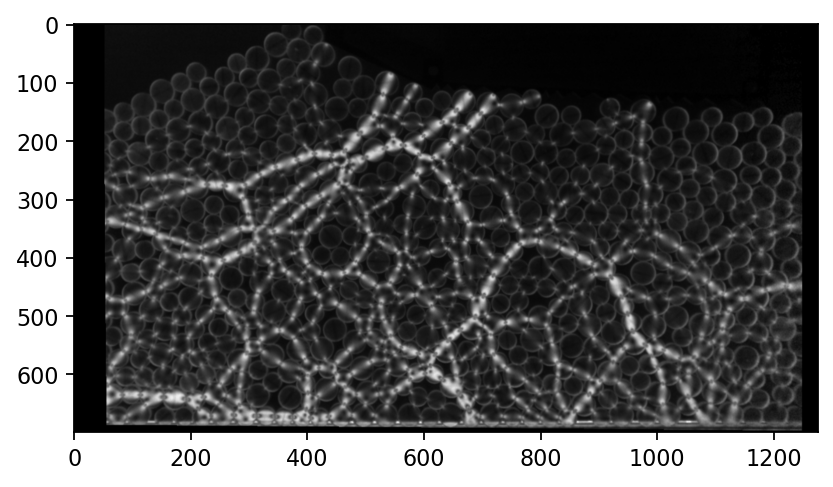

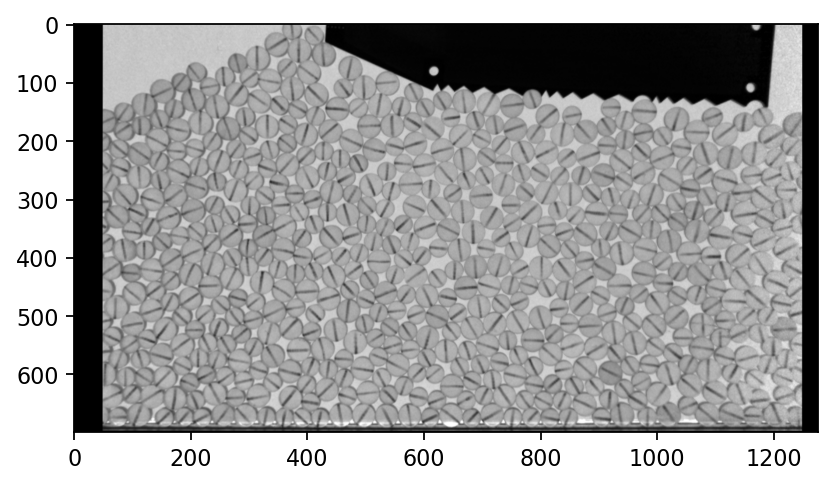

In [4]:
plt.imshow(cv2.imread(photoelasticImageData[0][0]))
plt.show()
plt.imshow(cv2.imread(whiteLightImageData[0][0]))
plt.show()

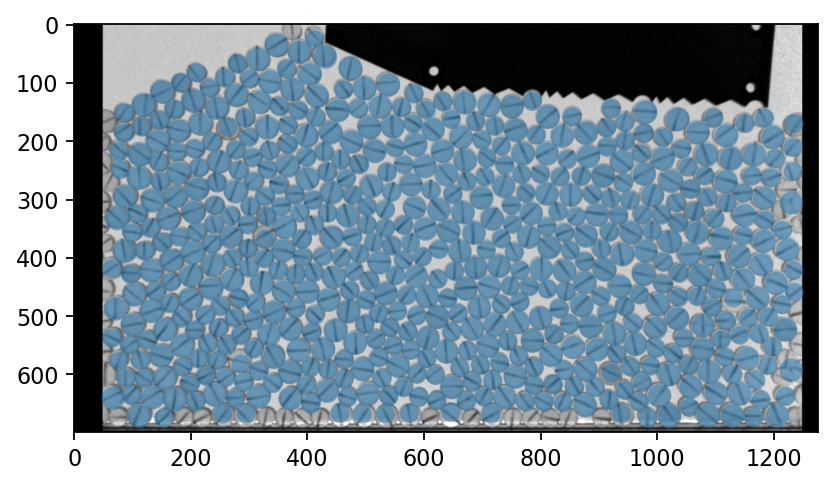

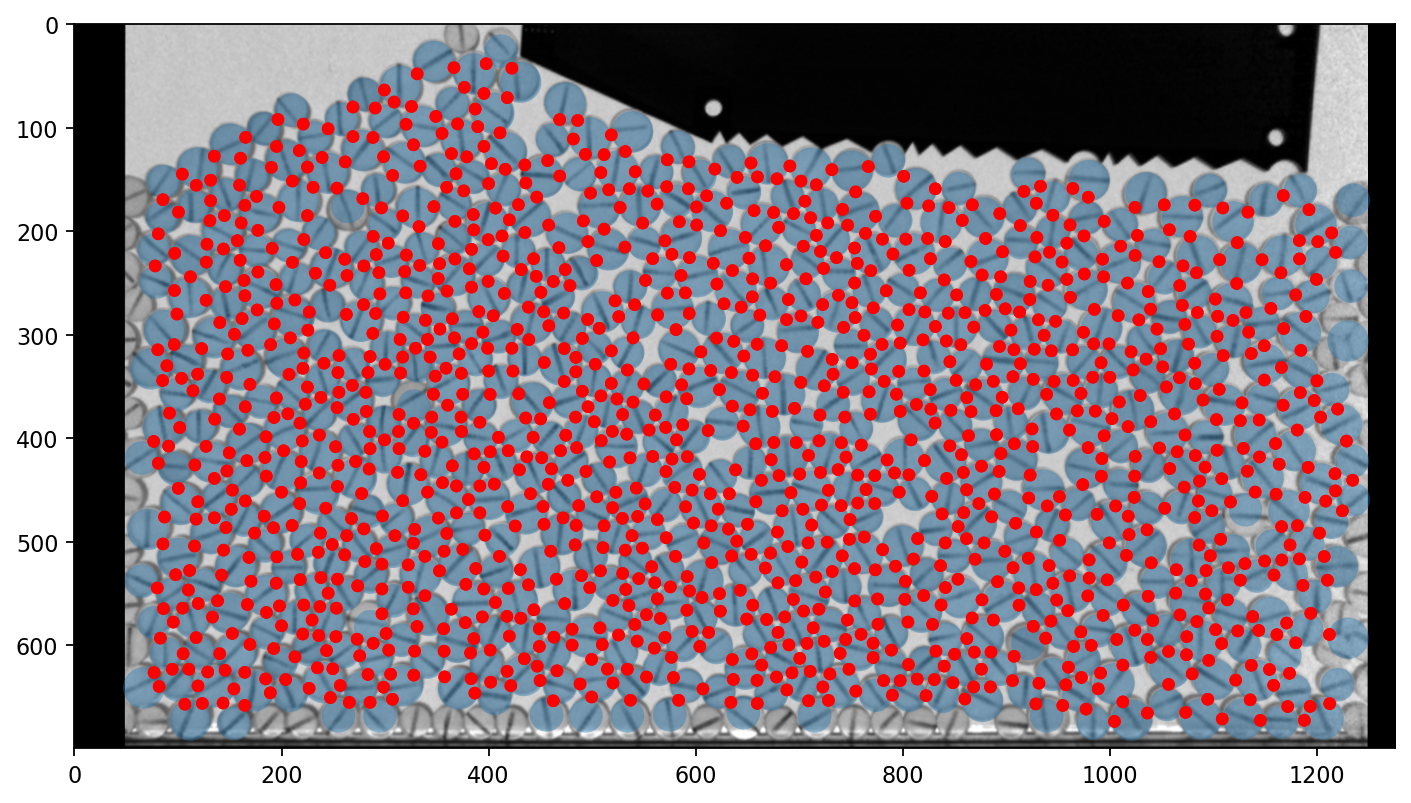

In [5]:
Visualization.visualizeTrackedParticles(trackingData[0][0], whiteLightImageData[0][0])
plt.show()
fig, ax = plt.subplots(figsize=(12, 6))

Visualization.markParticleContacts(trackingData[0][0], whiteLightImageData[0][0], ax=ax)
plt.show()

<class 'numpy.ndarray'>
[array([  1.3966,  10.367 ,  21.22  ,  26.067 ,  32.189 ,  41.959 ,
        43.741 ,  50.163 ,  54.569 ,  58.7   ,  64.298 ,  73.501 ,
        80.031 ,  88.377 ,  91.55  ,  98.821 , 108.64  , 112.89  ,
       118.17  , 123.12  , 127.81  , 132.22  , 135.76  , 141.74  ,
       149.32  , 154.24  , 158.14  , 161.94  , 168.66  , 171.19  ,
       176.56  ])]


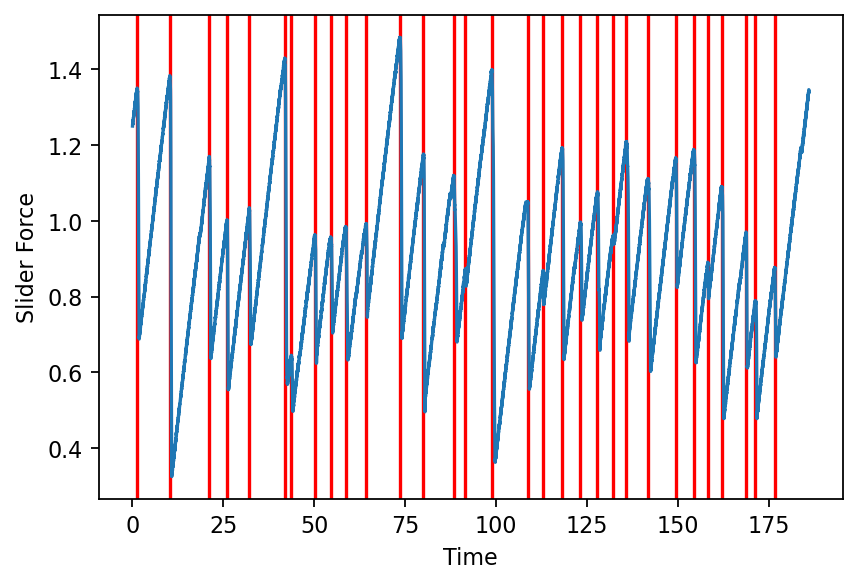

In [4]:
print(type(forceData[0][0]))
peakTimes = Preprocessing.identifyPeaks(forceData, returnTimes=True)
print(peakTimes)

for i in range(len(peakTimes[0])):
    plt.axvline(peakTimes[0][i], c='r')
plt.plot(forceData[0][:,1], forceData[0][:,2])
plt.xlabel('Time')
plt.ylabel('Slider Force')
plt.show()

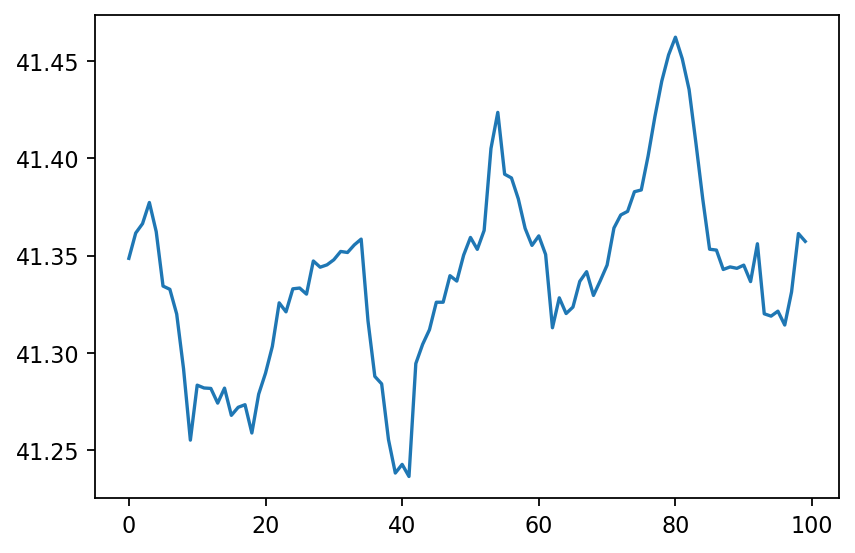

In [8]:
brightness = np.zeros(100)
for i in range(len(brightness)):
    brightness[i] = Analysis.averageBrightness(photoelasticImageData[0][i])
    
plt.plot(brightness)

In [10]:
print(ParticleAnalysis.averageCoordinationNumber(trackingData[0][10000]))

4.451499118165785
